## import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import os

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.spatial import distance
from numpy.linalg import inv

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 한글 폰트
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
from load_data import generate_dateset
from check_accuracy import *
from other_model import other_model
from mmts_tkde import *
from draw_pca_plot import pca_graph
from draw_pca_plot import contour

In [3]:
train3_1280,val3_1280,test3_1280 = generate_dateset(folder_path ='D:/LS실험데이터/정방향1_2_downsampling_1280/', exp_condition ='M3', exclude = 'heated')
train4_1280,val4_1280,test4_1280 = generate_dateset(folder_path ='D:/LS실험데이터/정방향1_2_downsampling_1280/', exp_condition ='M4', exclude = 'heated')
train5_1280,val5_1280,test5_1280 = generate_dateset(folder_path ='D:/LS실험데이터/정방향1_2_downsampling_1280/', exp_condition ='M5', exclude = 'heated')
train6_1280,val6_1280,test6_1280 = generate_dateset(folder_path ='D:/LS실험데이터/정방향1_2_downsampling_1280/', exp_condition ='M6', exclude = 'heated')

In [4]:
mts_proposed_(train3_1280, val3_1280)

(     mean_ch1  peak_ch1  crest_ch1  clearance_ch1  peak_ch2   rms_ch2  \
 0    0.018182  0.792242   2.844912       3.977901  1.548337  0.526331   
 1    0.024958  0.751379   2.778369       3.880846  1.787706  0.524533   
 2    0.021660  0.906380   3.121593       4.375065  1.699788  0.529818   
 3    0.022219  0.924549   3.197170       4.544345  1.581794  0.518713   
 4    0.026554  0.847350   2.691730       3.730555  1.659599  0.536204   
 ..        ...       ...        ...            ...       ...       ...   
 765  0.016464  1.357839   4.791846       7.177171  2.399483  0.507242   
 766  0.011118  1.233324   4.439270       6.637166  1.795198  0.520713   
 767  0.013448  1.239605   4.227479       6.578127  1.745120  0.505841   
 768  0.015700  1.061552   3.757815       5.637999  1.769807  0.480737   
 769  0.004057  1.122653   4.556237       6.903309  1.747515  0.492514   
 
      crest_ch2  Class  
 0     2.941758      0  
 1     3.408187      0  
 2     3.208247      0  
 3     3.0

In [5]:
mmts3_feats = MMTS_TKDE(train3_1280.append(val3_1280).reset_index(drop=True), test3_1280)

['mean_ch1', 'skewness_ch1', 'kurtosis_ch1', 'impulse_ch1', 'mean_ch2', 'skewness_ch2', 'clearance_ch2']
0_class 정확도 : 0.9454545454545454
1_class 정확도 : 1.0
2_class 정확도 : 0.8848484848484849
3_class 정확도 : 1.0
4_class 정확도 : 0.8606060606060606
5_class 정확도 : 0.9212121212121213
6_class 정확도 : 1.0
Training 평균 정확도 0.9445887445887445
Test 정확도: 0.8103896103896104


In [6]:
tr3_result_ = pd.read_csv('D:/icicic/실험결과/acc_by_alpha_for_m3_1280.csv')

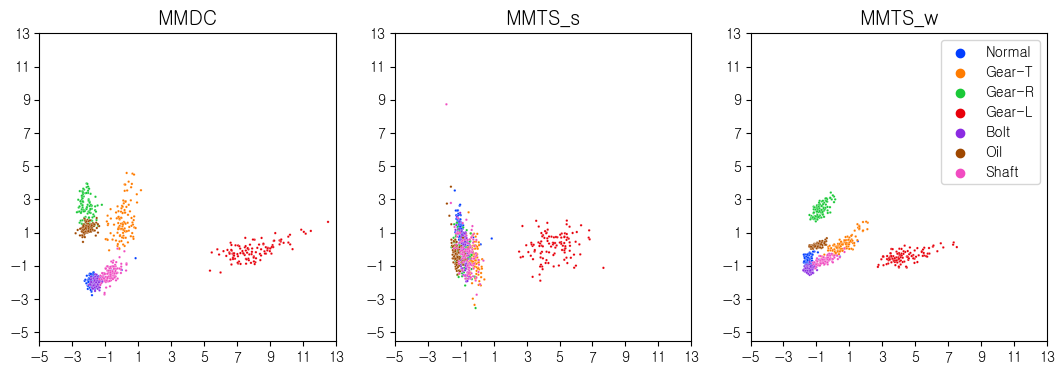

In [7]:
m3_ori_pca, m3_TKDE_pca, m3_Proposed_pca = pca_graph(train3_1280, str(mmts3_feats), str(tr3_result_['features'][0]))

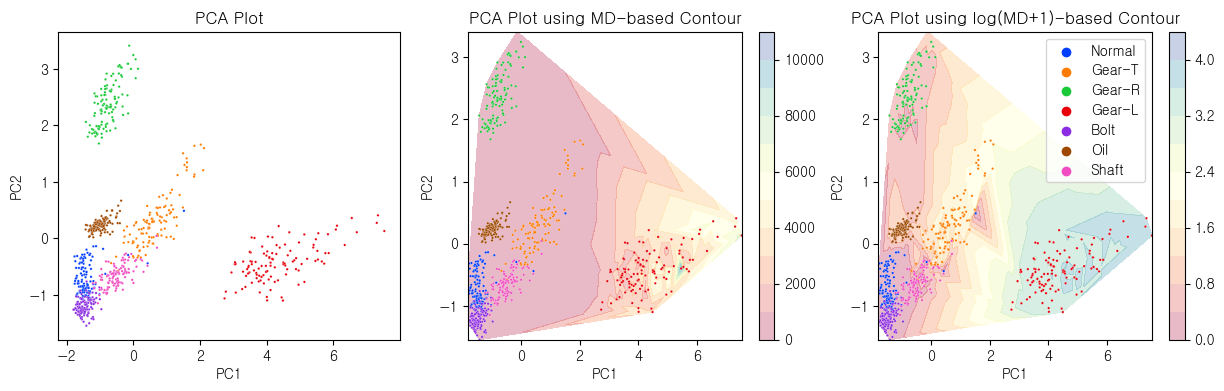

(<Figure size 1500x400 with 5 Axes>,
 array([<AxesSubplot:title={'center':'PCA Plot'}, xlabel='PC1', ylabel='PC2'>,
        <AxesSubplot:title={'center':'PCA Plot using MD-based Contour'}, xlabel='PC1', ylabel='PC2'>,
        <AxesSubplot:title={'center':'PCA Plot using log(MD+1)-based Contour'}, xlabel='PC1', ylabel='PC2'>],
       dtype=object))

In [8]:
contour(train3_1280, m3_Proposed_pca )